In [1]:
import numpy as np
import matplotlib.pyplot as plt

from logistic_regression import StratifiedShuffleSplit
from logistic_regression import LogisticRegression
from logistic_regression import StandardScaler
from logistic_regression import OrdinalEncoderColumn

import pandas as pd

#### Load Data
Divide dataset to 2 sets:
1. Train Set: 0.7 of orginal dataset
2. Test Set: 0.3 of orginal dataset

When using LogisticRegression all features have to be numerical, So we use ordinal encoding on nomial features.

In [2]:
def load_data(filepath):
    cols = ['Age','WorkClass','FinancialWeight','Education',
           'Education-num','MaritalStatus','Occupation','Relationship',
           'Race','Sex','CapitalGain','CapitalLoss','HourPerWeek',
           'NativeCountry','Income']
    data = pd.read_csv(filepath,header=None,names=cols)
    
    N,D = data.shape
    D = D-1
    
    X = np.empty((N,D),dtype='float64')
    y = np.where(data.iloc[:,-1]==' <=50K',0,1).astype('int64')
    
    nomial_features = [1,3,5,6,7,8,9,13]
    ordinal_encoder = OrdinalEncoderColumn()
    
    for i in range(D):
        if i in nomial_features:
            ordinal_encoder.fit(data.iloc[:,i])
            X[:,i] = ordinal_encoder.transform(data.iloc[:,i])
        else:
            X[:,i] = data.iloc[:,i]
    
    split = StratifiedShuffleSplit(test_size=0.3,shuffle=True)
    (X_train,y_train),(X_test,y_test) = split.split(X,y)
    return data,(X_train,y_train),(X_test,y_test)

data,(X_train,y_train),(X_test,y_test) = load_data('Data.csv')
print(f'X_train.shape: {X_train.shape} -- y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape} -- y_test.shape: {y_test.shape}')

X_train.shape: (22794, 14) -- y_train.shape: (22794,)
X_test.shape: (9767, 14) -- y_test.shape: (9767,)


If we normalize our data then logistic has higher accuracy on data

In [3]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [4]:
model = LogisticRegression()
history=model.fit(scaled_X_train,y_train,epochs=2000,batch_size=256,learning_rate=0.25,clip_norm=1,
                  return_history=True,verbose=1)

print(f'Train Acc:{model.score(scaled_X_train,y_train)}')

print(f'Test Acc:{model.score(scaled_X_test,y_test)}')

Epoch 2000 => loss=0.9954604976319176 - Acc=0.8308326752654207
Train Acc:0.8308326752654207
Test Acc:0.8279922186956077


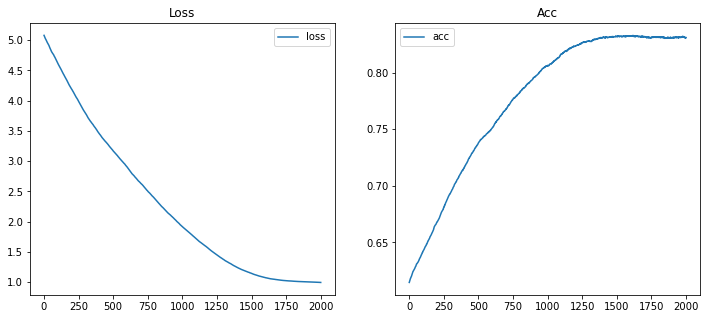

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history['loss'],label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('Acc')
plt.plot(history['acc'],label='acc')
plt.legend()
plt.savefig('Acc.png')